In [1]:
import pandas as pd
import altair as alt
import numpy as np
import scipy.stats as stats

alt.data_transformers.enable('json')
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [2]:
train_data_values = pd.read_csv('./data/train_values.csv')

In [3]:
train_data_values.head(15)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0
5,333020,8,558,6089,2,10,9,5,t,r,...,1,0,0,0,0,0,0,0,0,0
6,728451,9,475,12066,2,25,3,4,n,r,...,0,0,0,0,0,0,0,0,0,0
7,475515,20,323,12236,2,0,8,6,t,w,...,0,0,0,0,0,0,0,0,0,0
8,441126,0,757,7219,2,15,8,6,t,r,...,0,0,0,0,0,0,0,0,0,0
9,989500,26,886,994,1,0,13,4,t,i,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_data_labels = pd.read_csv('./data/train_labels.csv')

In [5]:
train_data_labels.head(15)

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3
5,333020,2
6,728451,3
7,475515,1
8,441126,2
9,989500,1


In [6]:
train_data_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
building_id                               260601 non-null int64
geo_level_1_id                            260601 non-null int64
geo_level_2_id                            260601 non-null int64
geo_level_3_id                            260601 non-null int64
count_floors_pre_eq                       260601 non-null int64
age                                       260601 non-null int64
area_percentage                           260601 non-null int64
height_percentage                         260601 non-null int64
land_surface_condition                    260601 non-null object
foundation_type                           260601 non-null object
roof_type                                 260601 non-null object
ground_floor_type                         260601 non-null object
other_floor_type                          260601 non-null object
position                                  260601 non

In [7]:
train_data = pd.concat([train_data_values, train_data_labels], axis=1)

In [8]:
train_data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,building_id,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,802906,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,28830,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,94947,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,590882,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,201944,3


In [9]:
train_data = train_data.drop(['building_id'], axis=1)

## Initial observations

- The geographic level features are about where the building is located. There are three levels, from the general to the most specific. Perhaps it is unnecessary to include all three predictors because, for instance, the geographic level 2 may be the main differentiating factor for the earthquake damage including the information given by other two levels. 
- There is a few integer predictors. Depending on the chosen models, they will probably need to be normalized. And I'm not sure what `area_percentage` and `height_percentage` mean exactly.
- There is quite a number of categorical predictors, which can be transformed into a lot of extra features through one hot encoder. As far as I can tell, none of them are ordinal especially since we are not given any explanation on the letter labels for each category. Also, I'm not sure if `legal_ownership_status` is relevant.
- There are lots of binary predictors. It will be interesting if any of them is flagged for barely any building, in which case it may not be relevant.
- There is no doubt that we must apply dimension reduction techniques here.

## Under-sampling

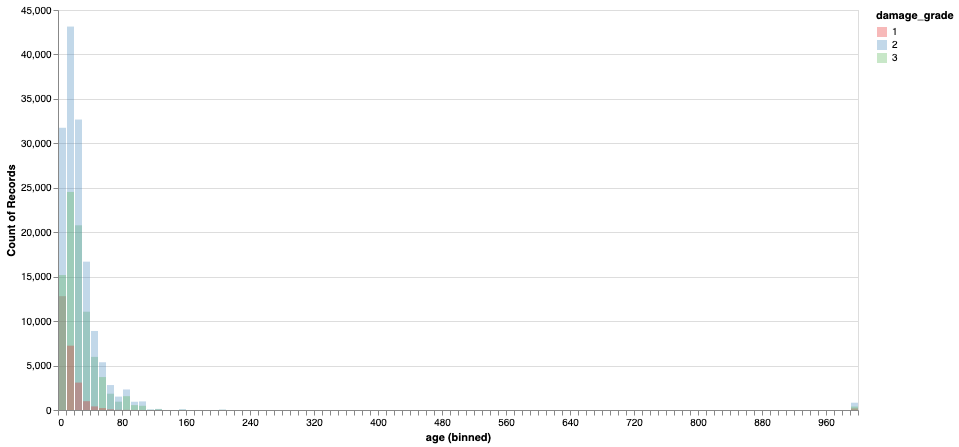

In [10]:
alt.Chart(train_data).mark_bar(
  opacity=0.3,
  interpolate='step'
).encode(
  alt.X('age:Q', bin=alt.Bin(maxbins=100)),
  alt.Y('count()', stack=None),
  alt.Color('damage_grade:N', scale=alt.Scale(scheme='set1'))
).properties(
  width=800,
  height=400
)

This actually shows there is a huge imbalance of data with a lot more grade 2 damage than grade 3 damage and especially grade 1 buildings. One must be aware of this fact throughout the project. Some models might be able to deal with this imbalance, but some need to be insulated against that by  tackling this problem before training. For now, in order to have a more balanced visualization, we will balance out the data by resampling. Also, we can see the outliers in this chart.

In [11]:
train_data[train_data['damage_grade'] == 1]

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
7,20,323,12236,2,0,8,6,t,w,q,...,0,0,0,0,0,0,0,0,0,1
9,26,886,994,1,0,13,4,t,i,n,...,0,0,0,0,0,0,0,0,0,1
36,13,305,5956,2,0,9,8,t,r,q,...,0,0,0,0,0,0,0,0,0,1
45,7,157,5265,1,5,11,3,n,i,x,...,0,1,0,0,0,0,0,0,0,1
49,26,762,742,1,0,15,3,n,u,x,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260541,13,1365,11849,1,100,6,3,t,r,n,...,0,0,0,0,0,0,0,0,0,1
260545,10,603,12101,3,0,13,10,n,i,x,...,0,0,0,0,0,0,0,0,0,1
260557,8,206,8507,1,0,12,3,t,r,x,...,0,0,0,0,0,0,0,0,0,1
260567,6,197,11094,2,15,9,6,t,r,n,...,0,0,0,0,0,0,0,0,0,1


In [12]:
balanced_train_data = train_data.sample(frac=1).groupby('damage_grade').head(25124)

## Age

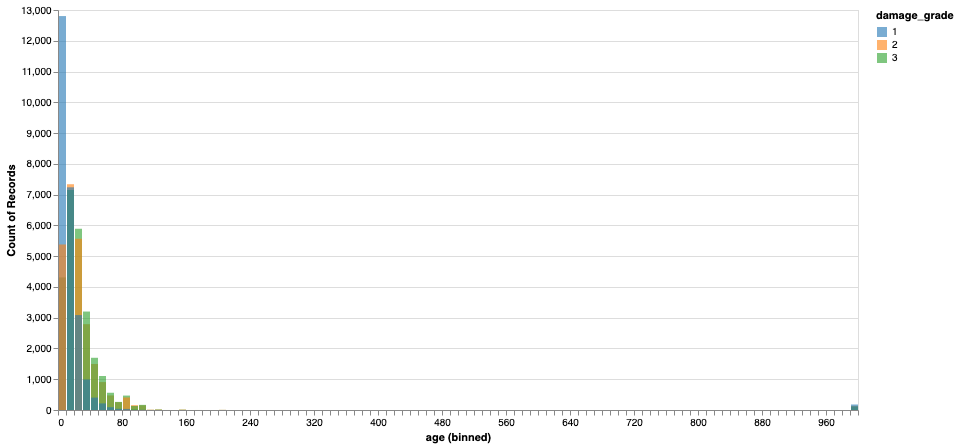

In [13]:
alt.Chart(balanced_train_data).mark_bar(opacity=0.6).encode(
  alt.X('age:Q', bin=alt.Bin(maxbins=100)),
  alt.Y('count()', stack=None),
  alt.Color('damage_grade:N', scale=alt.Scale(scheme='category10'))
).properties(
  width=800,
  height=400
)

Now the distribution shows a more telling and reasonable story. Buildings that are older tend to suffer worse damage, although the age difference between the damage grade 2 and 3 groups is not extremely significant.

Now we will do the same visualization for a bunch of other integer predictors

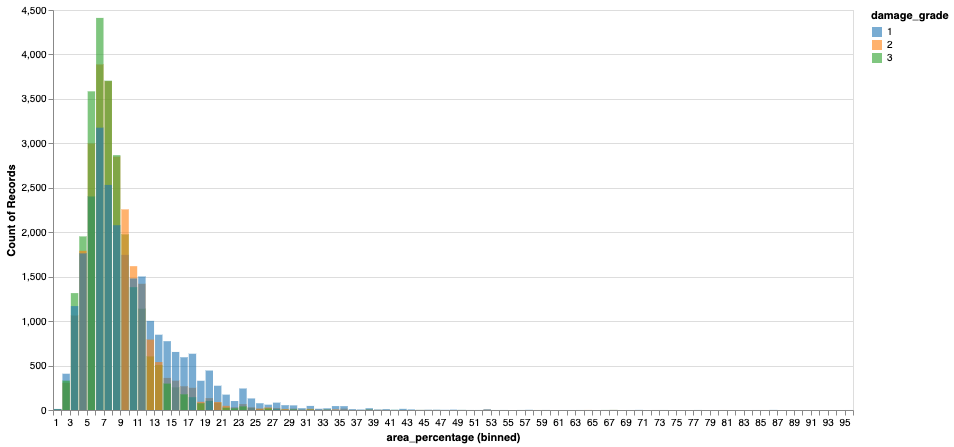

In [14]:
alt.Chart(balanced_train_data).mark_bar(opacity=0.6).encode(
  alt.X('area_percentage:Q', bin=alt.Bin(maxbins=100)),
  alt.Y('count()', stack=None),
  alt.Color('damage_grade:N', scale=alt.Scale(scheme='category10'))
).properties(
  width=800,
  height=400
)

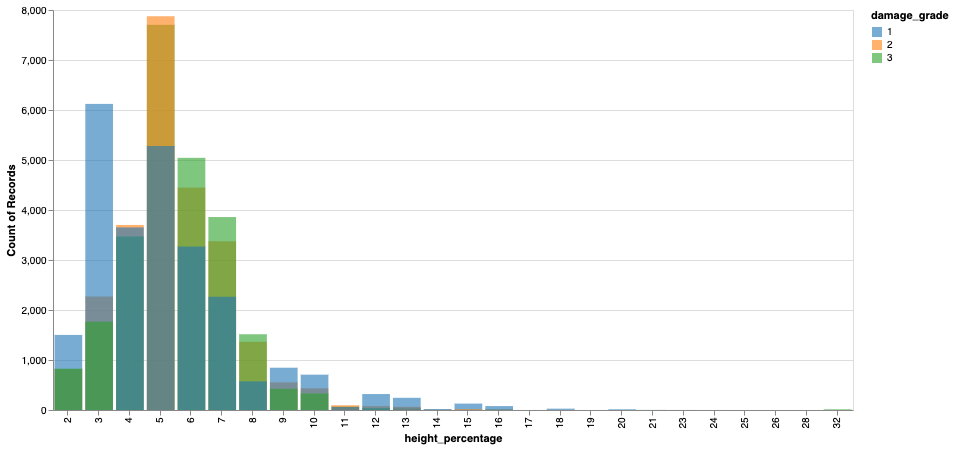

In [55]:
alt.Chart(balanced_train_data).mark_bar(opacity=0.6).encode(
  alt.X('height_percentage:N'),
  alt.Y('count()', stack=None),
  alt.Color('damage_grade:N', scale=alt.Scale(scheme='category10'))
).properties(
  width=800,
  height=400
)

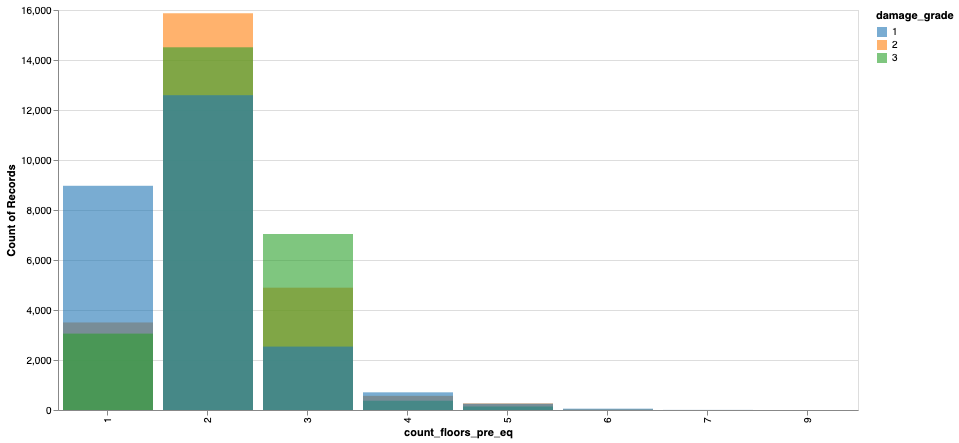

In [16]:
alt.Chart(balanced_train_data).mark_bar(opacity=0.6).encode(
  alt.X('count_floors_pre_eq:N'),
  alt.Y('count()', stack=None),
  alt.Color('damage_grade:N', scale=alt.Scale(scheme='category10'))
).properties(
  width=800,
  height=400
)

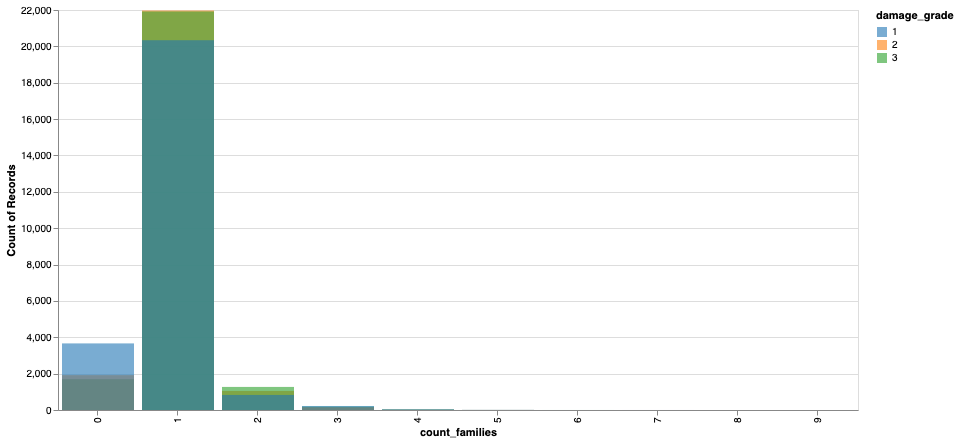

In [17]:
alt.Chart(balanced_train_data).mark_bar(opacity=0.6).encode(
  alt.X('count_families:N'),
  alt.Y('count()', stack=None),
  alt.Color('damage_grade:N', scale=alt.Scale(scheme='category10'))
).properties(
  width=800,
  height=400
)

Visually, the rest of the integer predictors all follow a similar pattern. There is a different among the groups, but there is less of a recognizable pattern. We could do some ANOVA tests to see.

In [18]:
def get_anova_results(feature):
  print(feature + ':')
  
  print(stats.f_oneway(
    balanced_train_data[feature][balanced_train_data['damage_grade'] == 1], 
    balanced_train_data[feature][balanced_train_data['damage_grade'] == 2],
    balanced_train_data[feature][balanced_train_data['damage_grade'] == 3]
  ))
  
  print('-----------------------------------------------------------------------')

In [19]:
for feature in ['count_families', 'count_floors_pre_eq', 'height_percentage', 'area_percentage', 'age']:
  get_anova_results(feature)

count_families:
F_onewayResult(statistic=282.4624964259653, pvalue=6.103133733762797e-123)
-----------------------------------------------------------------------
count_floors_pre_eq:
F_onewayResult(statistic=1688.3964338554338, pvalue=0.0)
-----------------------------------------------------------------------
height_percentage:
F_onewayResult(statistic=220.8082912723547, pvalue=2.4211993293356814e-96)
-----------------------------------------------------------------------
area_percentage:
F_onewayResult(statistic=1455.2017373557626, pvalue=0.0)
-----------------------------------------------------------------------
age:
F_onewayResult(statistic=156.39333176817013, pvalue=1.6587779532857644e-68)
-----------------------------------------------------------------------


In [20]:
corrmat = train_data[
  ['count_families', 'count_floors_pre_eq', 'height_percentage', 'area_percentage', 'age']
].corr()

In [21]:
corrmat

,count_families,count_floors_pre_eq,height_percentage,area_percentage,age
count_families,1.000000,0.086586,0.064316,0.088630,0.005309
count_floors_pre_eq,0.086586,1.000000,0.772734,0.101071,0.086668
height_percentage,0.064316,0.772734,1.000000,0.196645,0.061074
area_percentage,0.088630,0.101071,0.196645,1.000000,-0.004323
age,0.005309,0.086668,0.061074,-0.004323,1.000000


In [22]:
corr_df = pd.melt(corrmat.reset_index(), id_vars='index', var_name='feature', value_name='coor')

In [23]:
corr_df

,index,feature,coor
0,count_families,count_families,1.000000
1,count_floors_pre_eq,count_families,0.086586
2,height_percentage,count_families,0.064316
3,area_percentage,count_families,0.088630
4,age,count_families,0.005309
5,count_families,count_floors_pre_eq,0.086586
6,count_floors_pre_eq,count_floors_pre_eq,1.000000
7,height_percentage,count_floors_pre_eq,0.772734
8,area_percentage,count_floors_pre_eq,0.101071
9,age,count_floors_pre_eq,0.086668


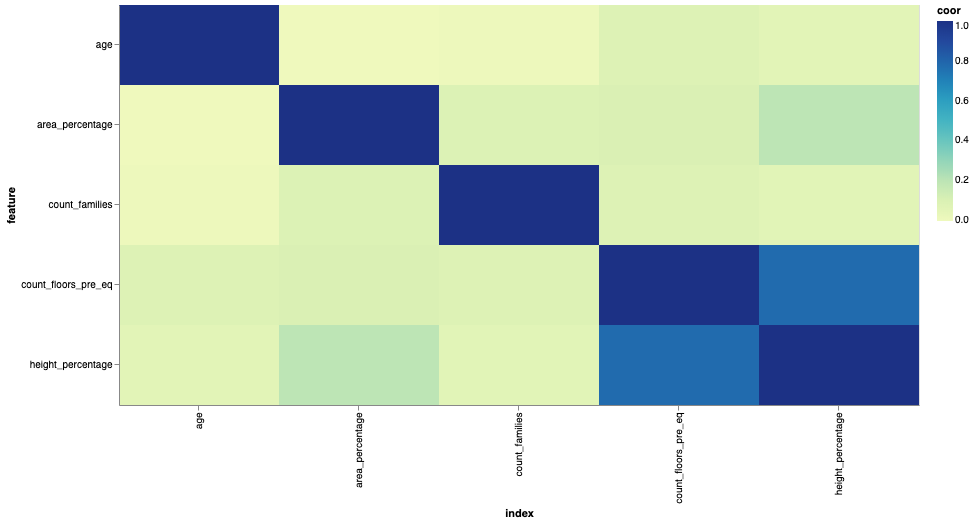

In [24]:
alt.Chart(corr_df).mark_rect().encode(
    x='index:O',
    y='feature:O',
    color='coor:Q'
).properties(
  width=800,
  height=400
)

Only `court_floors_pre_eq` and `height_percentage` seem to be highly correlated.

## Categorical features

In [25]:
def visialize_categorical_feature(name):
  return alt.Chart(balanced_train_data).transform_joinaggregate(
    total='count(*)'
  ).transform_calculate(
    pct='1 / datum.total'
  ).mark_bar().encode(
    y='damage_grade:O',
    x=alt.X('sum(pct):Q', axis=alt.Axis(format='%')),
    color='damage_grade:N',
    row=f'{name}:N'
  ).properties(
    width=600,
    height=100
  ).configure_axis(
    labelFontSize=13,
    titleFontSize=13
  ).configure_legend(
    titleFontSize=13
  ).configure_header(
    titleFontSize=13,
    labelFontSize=13
  )

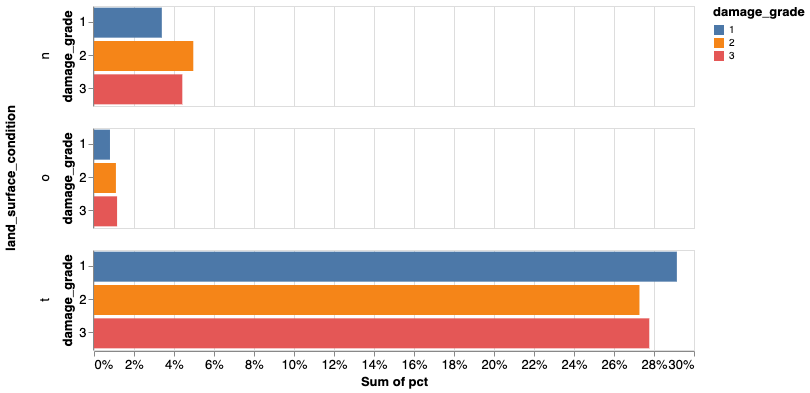

In [26]:
visialize_categorical_feature('land_surface_condition')

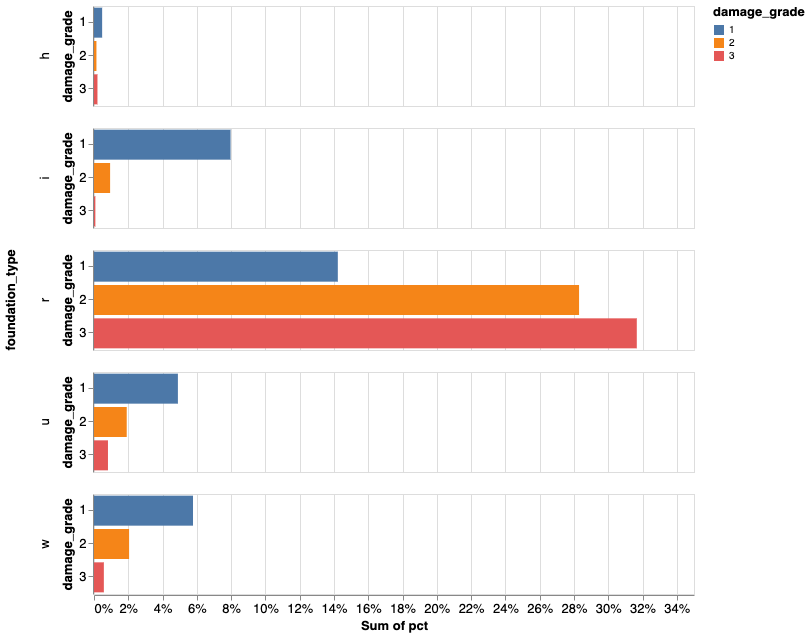

In [27]:
visialize_categorical_feature('foundation_type')

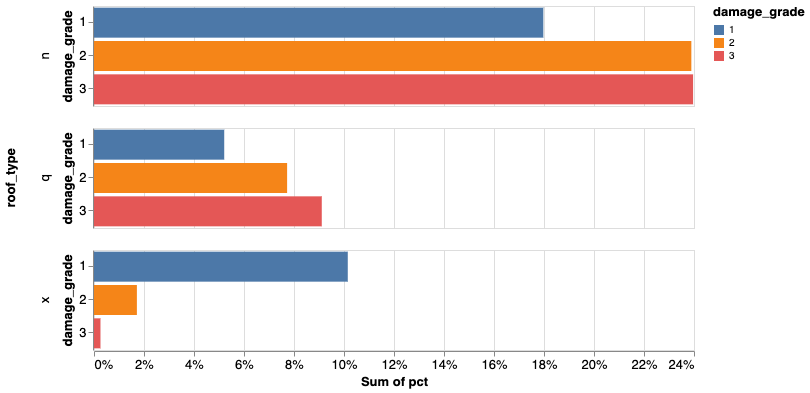

In [28]:
visialize_categorical_feature('roof_type')

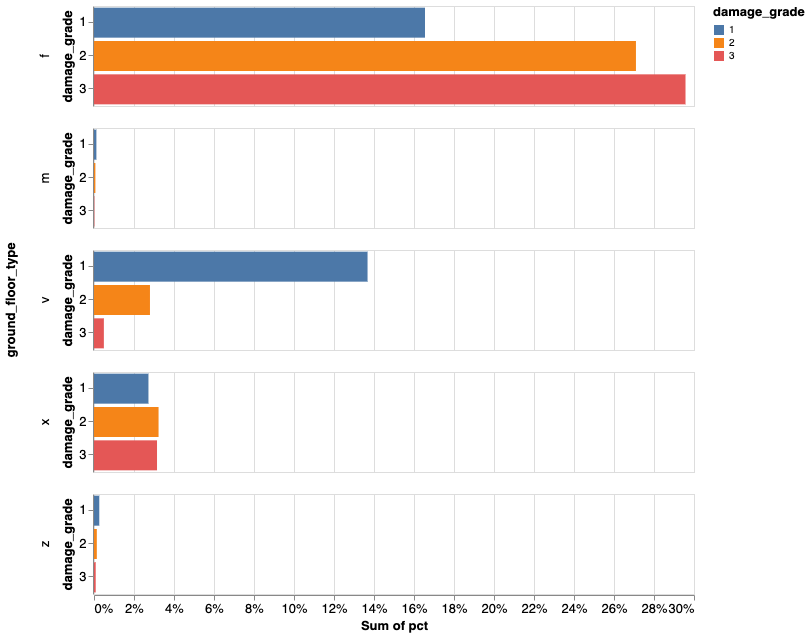

In [29]:
visialize_categorical_feature('ground_floor_type')

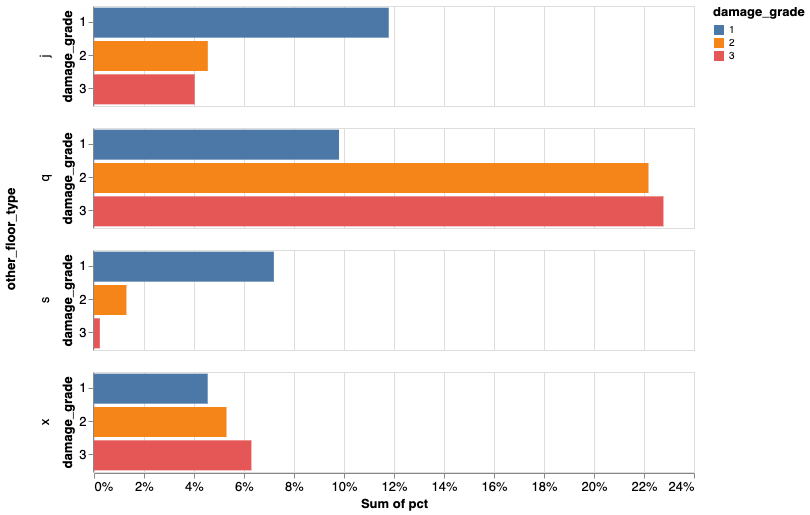

In [30]:
visialize_categorical_feature('other_floor_type')

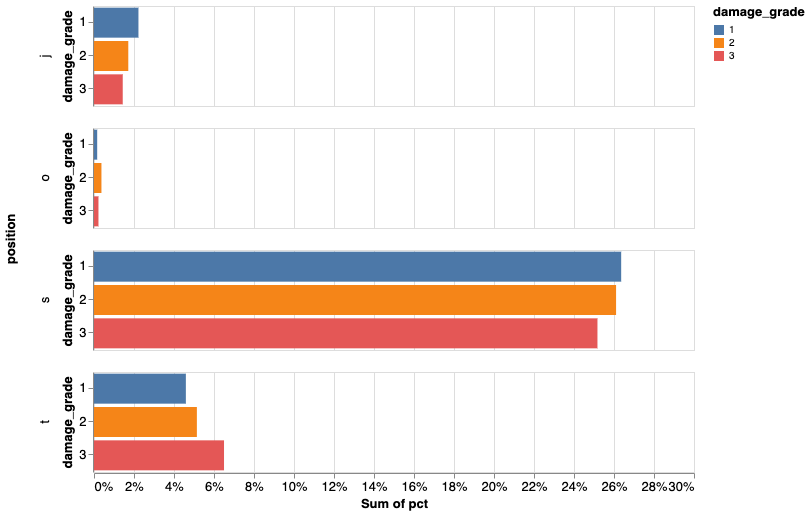

In [31]:
visialize_categorical_feature('position')

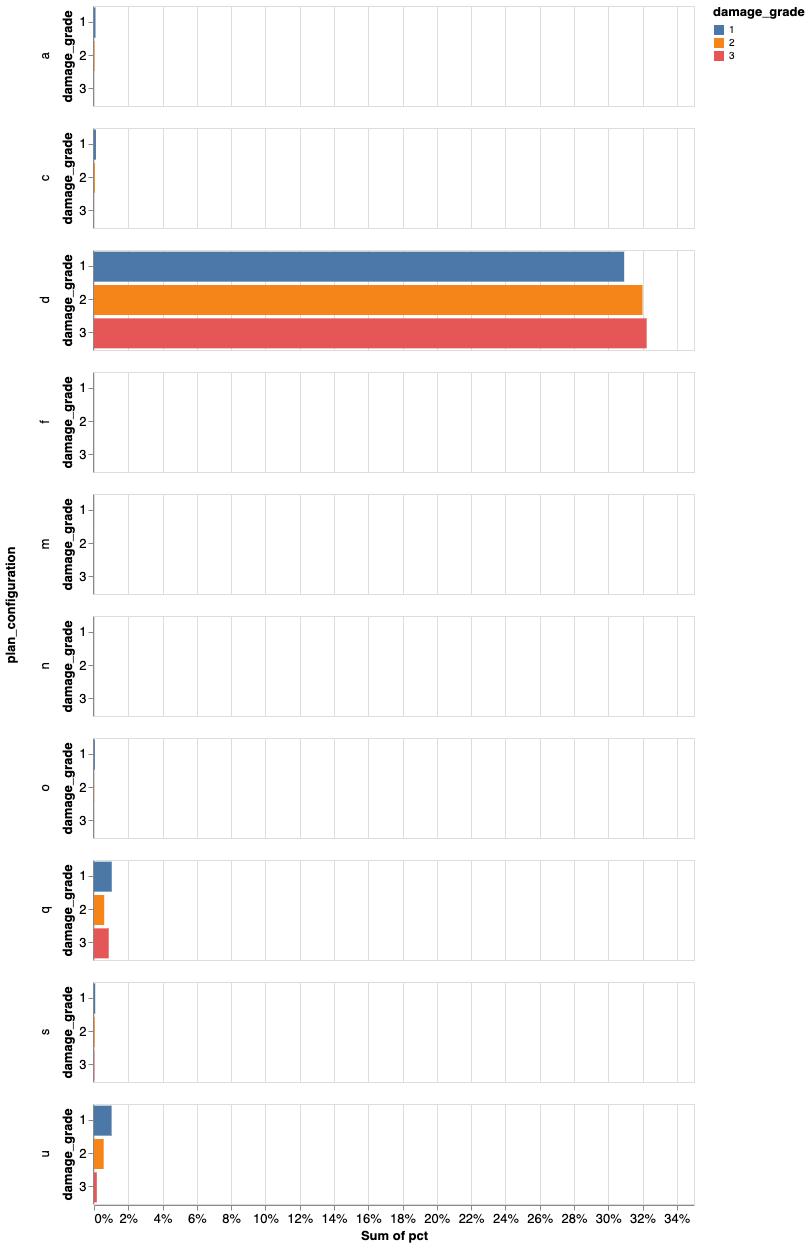

In [32]:
visialize_categorical_feature('plan_configuration')

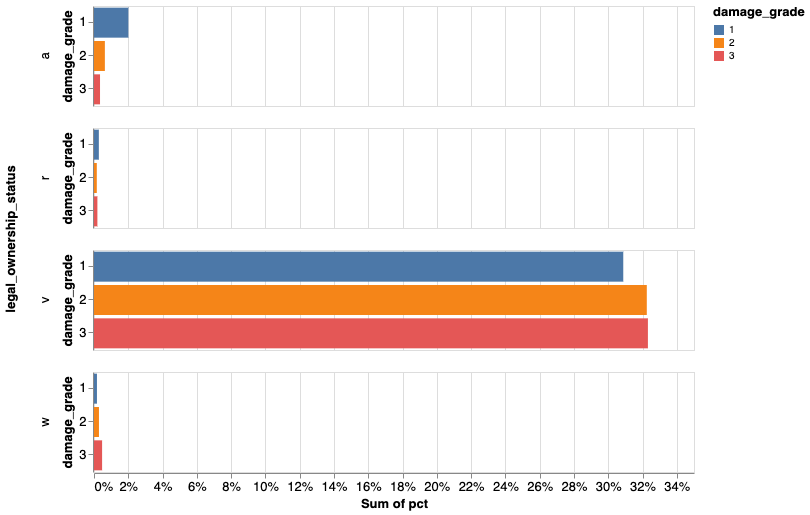

In [33]:
visialize_categorical_feature('legal_ownership_status')

Surprisingly, a lot of categorical features are quite telling in terms of which damage grade the building would suffer in the earthquake because for some categories in a predictor, a lot more buildings suffered higher damager and the opposite is true for some categories in another predictor. For instance, if a building's ground floor type was v as opposed to f, that building would relatively have a lot less chance of suffering the highest damage grade. On the other hand, some categorical features lack variability among the damage grades. Some examples are plan configuration and position. It's good to keep them in mind as we move along this project.

## Binary features(we will look at some)

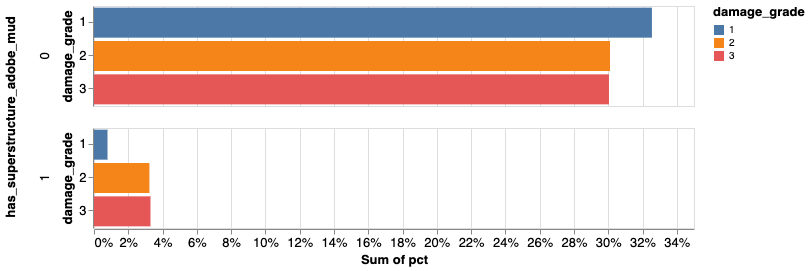

In [34]:
visialize_categorical_feature('has_superstructure_adobe_mud')

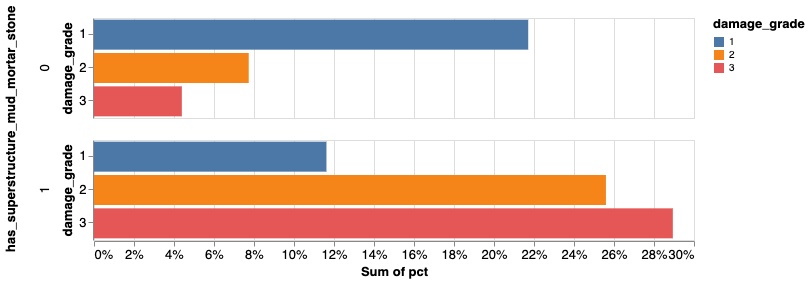

In [35]:
visialize_categorical_feature('has_superstructure_mud_mortar_stone')

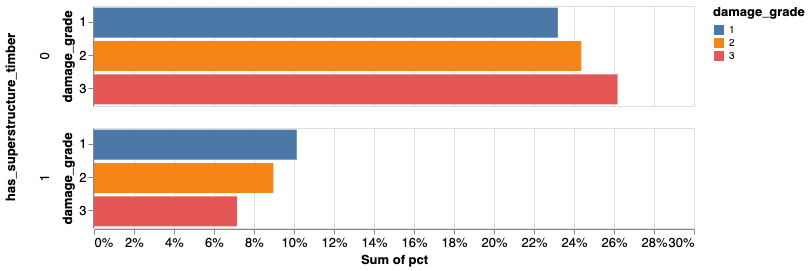

In [36]:
visialize_categorical_feature('has_superstructure_timber')

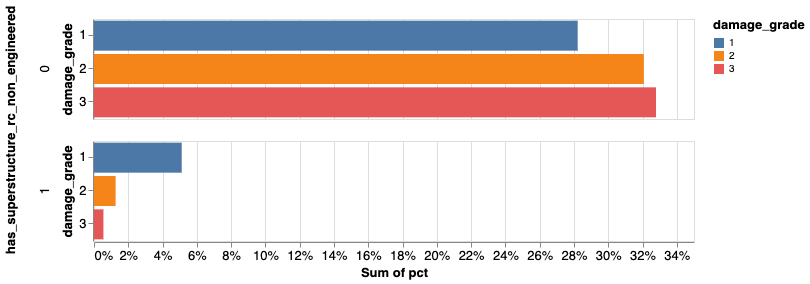

In [37]:
visialize_categorical_feature('has_superstructure_rc_non_engineered')

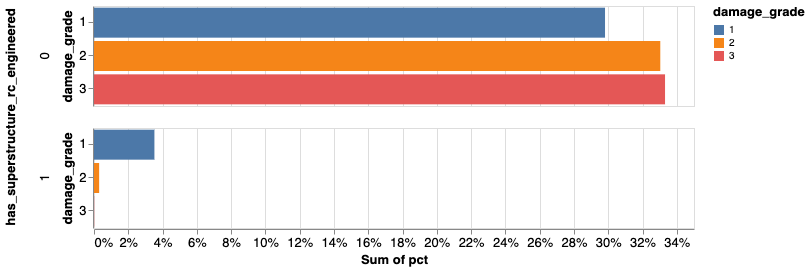

In [38]:
visialize_categorical_feature('has_superstructure_rc_engineered')

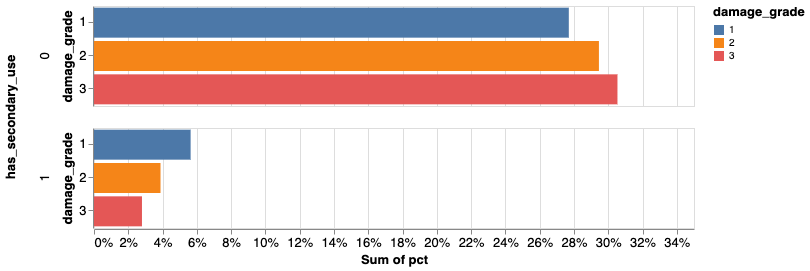

In [39]:
visialize_categorical_feature('has_secondary_use')

At least based on the features we look at, there are variabilities among damage grades. An extreme example is `has_superstructure_mud_mortar_stone`.

## Geo features

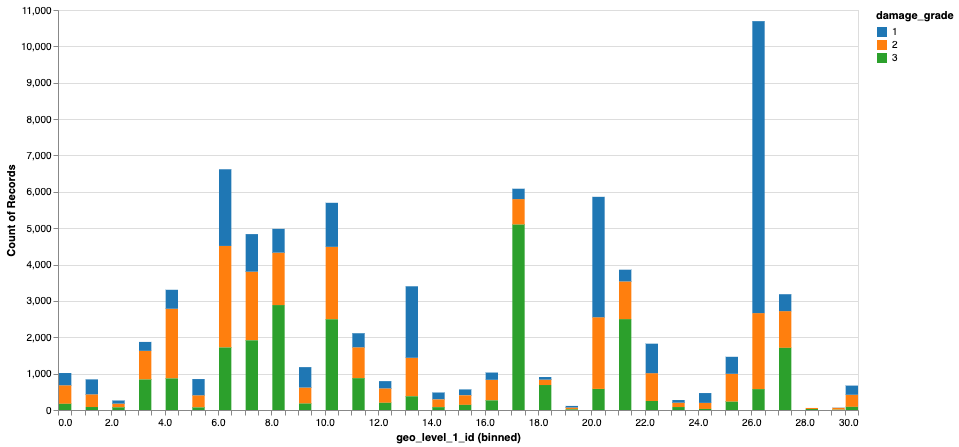

In [52]:
alt.Chart(balanced_train_data).mark_bar().encode(
  alt.X('geo_level_1_id:Q', bin=alt.Bin(maxbins=100)),
  alt.Y('count()'),
  alt.Color('damage_grade:N', scale=alt.Scale(scheme='category10'))
).properties(
  width=800,
  height=400
)

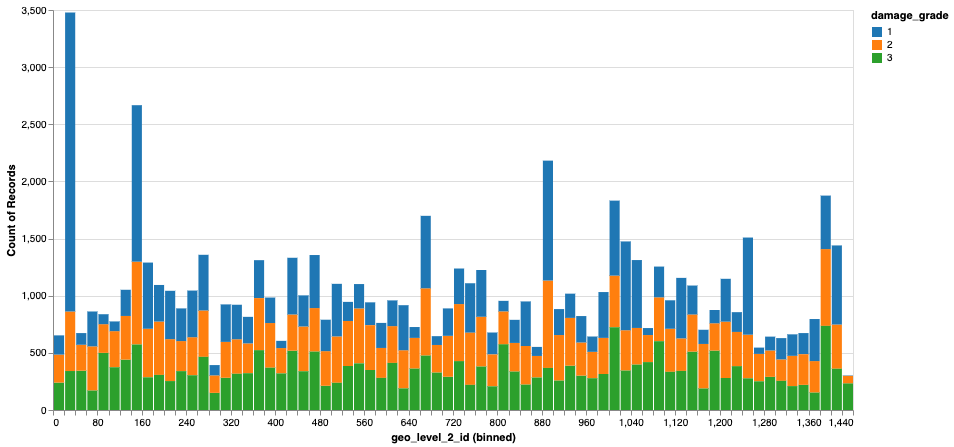

In [53]:
alt.Chart(balanced_train_data).mark_bar().encode(
  alt.X('geo_level_2_id:Q', bin=alt.Bin(maxbins=100)),
  alt.Y('count()'),
  alt.Color('damage_grade:N', scale=alt.Scale(scheme='category10'))
).properties(
  width=800,
  height=400
)

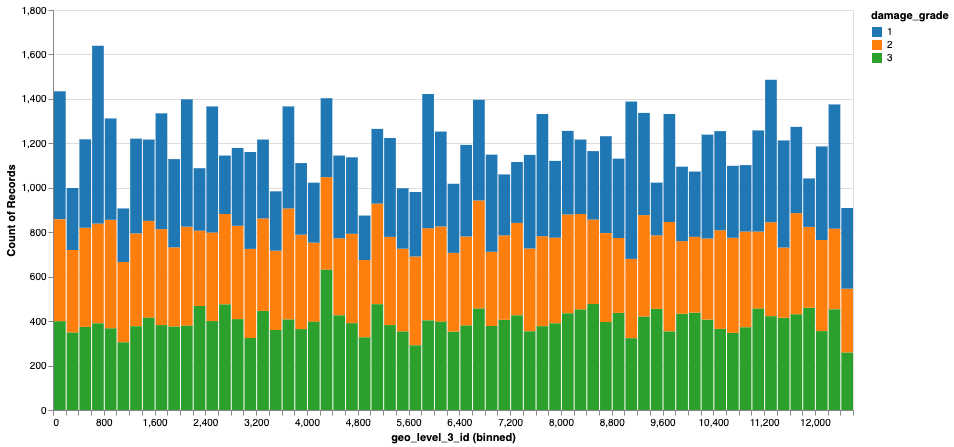

In [54]:
alt.Chart(balanced_train_data).mark_bar().encode(
  alt.X('geo_level_3_id:Q', bin=alt.Bin(maxbins=100)),
  alt.Y('count()'),
  alt.Color('damage_grade:N', scale=alt.Scale(scheme='category10'))
).properties(
  width=800,
  height=400
)

Doesn't seem like there is any obvious pattern to group the geo ids of any kind. However, for level 1 and 2 especially, the ids do have varying levels of damage grades, which can be used for prediction. This visualization also shows that perhaps it is unnecessary to include all levels of ids for predictors. Plus, including all would create way too many features. 